# Алиев Азнаур, Б01-909 

## ОДУ XI.9.5

## Для численного отыскания периодического с периодом единица решения уравнения

$$
y'' - P^2(x)y = f(x)
$$

## Вычислить решение при:

$$
P^2(x) =  10 + \sin{2\pi x},
f(x) = \cos{2\pi x}, 
h = 0.005,  Nh = 1, T = 1
$$

## Разностная схема:

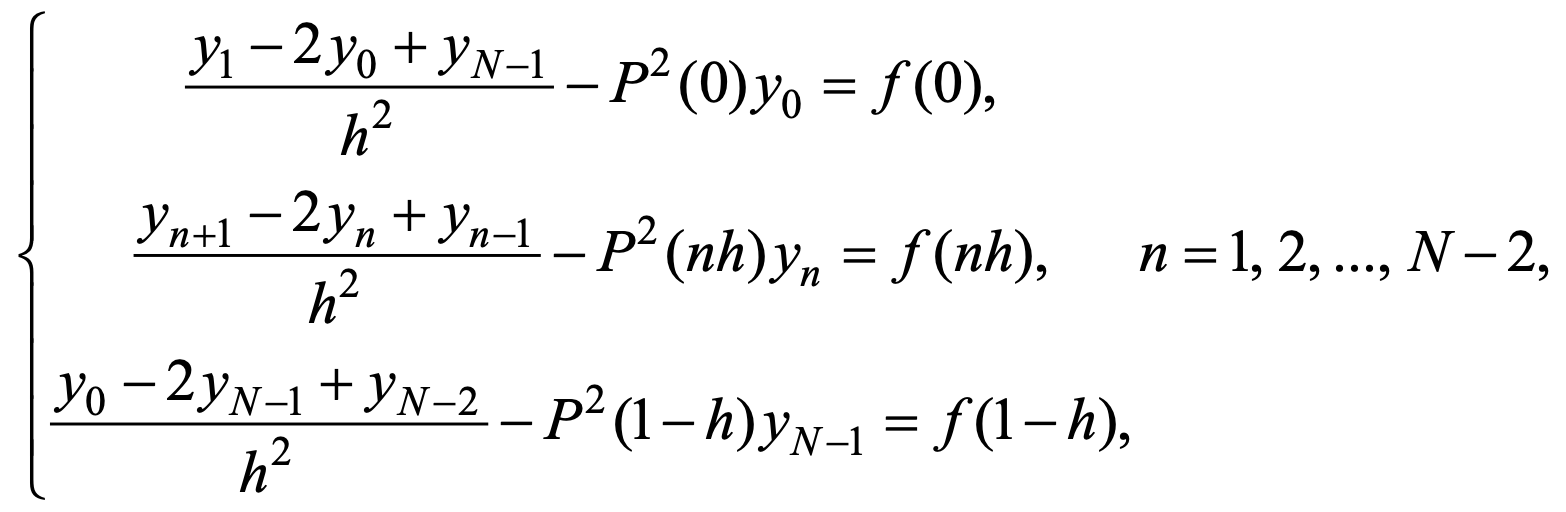

## Получим

$$
\left\lbrace
\begin{matrix}
y_{\space N - 1} \space \space - \left(2 + P^2\space (0)\space h^2\right)\space y_0 + y_{1} = f(0)\space h^2 \\
y_{\space n - 1} \space \space - \left(2 + P^2\space (nh)\space h^2\right)\space y_n + y_{n+1} = f(nh) \space h^2 \\
y_{\space N - 2} \space \space- \left(2 + P^2\space (1-h)\space h^2\right)\space y_{\space N - 1} \space+ y_0 = f(1-h)\space h^2 \\
\end{matrix}
\right. 
$$

$$
x_k = kh
$$

$$
y_{n-1}\space = (2 + P^2 \space (x_k\space)\space h^2 \space) y_n + f(x_k)\space h^2 - y_{n+1}
$$
$$
\space
$$
$$
y_{\space N - 3}\space = (2 + P^2 \space (x_{N - 2}\space\space\space h^2\space)\space* y_{\space N - 2}\space\space + f(x_{k - 2}\space\space)\space\space h^2 - y_{\space N-1}
$$

In [1]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
h = 0.005
N = math.ceil(1 / h)

In [4]:
def P(x):
    return 10 + np.sin(2 * np.pi * x)

In [5]:
def f(x):
    return np.cos(2 * np.pi * x)

## Метод прогонки


In [6]:
def Tridiagonal(matrix, Y):
    A = copy.copy(matrix)
    b = copy.copy(Y)

    dim = A.shape[0]

    c = []
    d = []

    c.append(-A[0][1] / A[0][0])                                    
    d.append(b[0] / A[0][0])    

    for i in range(1, A.shape[0] - 1):
        d_ = b[i] - A[i][i-1] * d[-1]
        d_ = d_ / (A[i][i-1] * c[-1] + A[i][i])
        d.append(d_)
        c_ = A[i][i + 1]
        c_ = c_ / (A[i][i - 1] * c[-1] + A[i][i])
        c.append(-c_)


    X = np.zeros(A.shape[0])

    X[-i] = (b[-1] - A[dim - 1][dim - 2] * d[-1])  
    X = X / (c[-1] * A[dim - 1][dim - 2] + A[dim -1][dim - 1])

    for i in range(2, A.shape[0] + 1):    
        X[-i] = X[-i + 1] * c[-i + 1] + d[-i + 1]
    
    return X

In [12]:
x = np.array([x_k * h for x_k in range(-4*N, 4*N)])

A = np.diag(-(2 + h**2 * P(x)))  
A += np.eye(8*N, 8*N, 1) # диагональ над главной
A += np.eye(8*N, 8*N, -1) # диагональ под главной

y = Tridiagonal(A, h**2 * f(x)) # Метод прогонки

pass

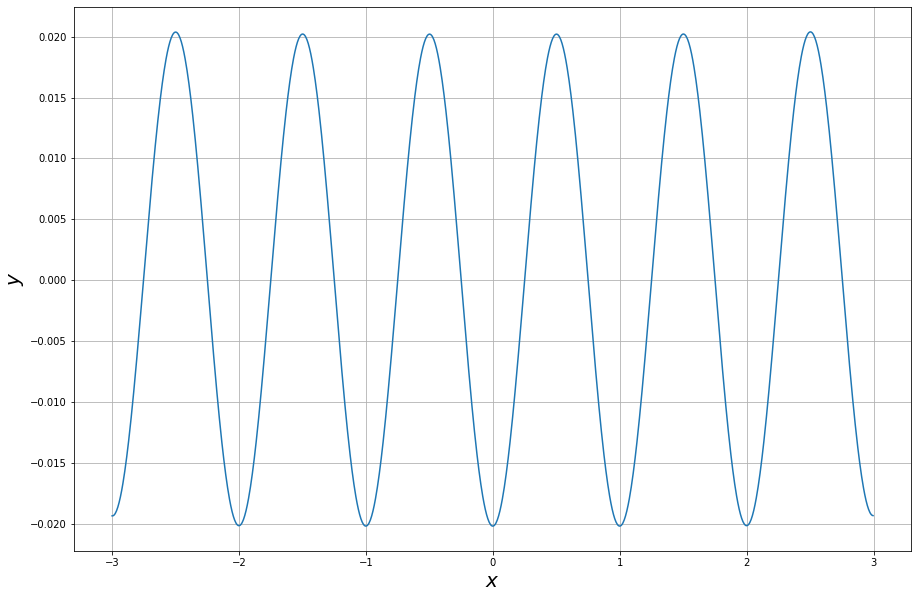

In [11]:
plt.figure(figsize=(15, 10))
plt.grid()
plt.xlabel("$x$", fontsize=20)
plt.ylabel("$y$", fontsize=20)
plt.plot(x[N:7*N], y[N:7*N]) 
pass